#####Ofir Bitton 318179728
#####Shir Toledano 206373706

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#PCA

##Q1

In [ ]:
df_democracy3 = pd.read_excel('/content/ENGLISH_VERSION_IsraelDemocracySurvey2021_AFTER CLEANING (4) (1).xlsx')

In [ ]:
df_democracy3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 74 columns):
 #   Column                                                                                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                  --------------  -----  
 0   Unnamed: 0.1                                                                                                                                                                                                                            752 non-null    int64  
 1   Unnamed: 0                                                                                                 

In [ ]:
df_democracy3.head()

,Unnamed: 0.1,Unnamed: 0,What do you think of Israel's situation today?,How much you trust in each of these institutions: the media,How much you trust in each of these institutions: the Supreme Court,How much you trust in each of these institutions: the police,How much you trust in each of these institutions: President of the State,How much you trust in each of these institutions: the introduction,How much you trust in each of these institutions: the IDF,How much you trust in each of these institutions: the government,...,Which party vote in the last election for the Knesset (March 2021):_There is a future,Which party vote in the last election for the Knesset (March 2021):_Thunder,Which party vote in the last election for the Knesset (March 2021):_Torah judaism,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv
0,0,1,2,3,2,1,0,1,3,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1,1,1,1,2,1,2,1,...,0,0,0,0,0,0,0,0,0,1
2,2,3,4,1,2,2,3,2,3,2,...,0,0,0,1,0,0,0,0,0,0
3,3,4,4,0,4,1,4,2,4,3,...,0,0,0,0,0,1,0,0,0,0
4,4,5,3,2,2,2,2,2,3,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_democracy3.drop(labels=['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

##Q2

In [ ]:
df_copy = df_democracy3.copy()

In [ ]:
condition = (df_copy['Which party vote in the last election for the Knesset (March 2021):_A white note'] == 1) | (df_copy['Which party vote in the last election for the Knesset (March 2021):_I did not vote'] == 1) | (df_copy['Which party vote in the last election for the Knesset (March 2021):_Refuses to reply'] == 1)

In [ ]:
df_copy = df_copy.loc[~condition]
df_copy.head()

,What do you think of Israel's situation today?,How much you trust in each of these institutions: the media,How much you trust in each of these institutions: the Supreme Court,How much you trust in each of these institutions: the police,How much you trust in each of these institutions: President of the State,How much you trust in each of these institutions: the introduction,How much you trust in each of these institutions: the IDF,How much you trust in each of these institutions: the government,How much do you trust in each of these institutions: the parties,Do you agree or disagree that Israel should have more rights to Jewish citizens than non-Jewish citizens:,...,Which party vote in the last election for the Knesset (March 2021):_There is a future,Which party vote in the last election for the Knesset (March 2021):_Thunder,Which party vote in the last election for the Knesset (March 2021):_Torah judaism,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv
0,2,3,2,1,0,1,3,1,1,4,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,2,1,2,1,1,4,...,0,0,0,0,0,0,0,0,0,1
2,4,1,2,2,3,2,3,2,1,1,...,0,0,0,1,0,0,0,0,0,0
3,4,0,4,1,4,2,4,3,1,1,...,0,0,0,0,0,1,0,0,0,0
4,3,2,2,2,2,2,3,1,1,2,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_copy.shape

(627, 72)

##Q3


In [ ]:
left_parties= ['Which party vote in the last election for the Knesset (March 2021):_Blue and white',
               'Which party vote in the last election for the Knesset (March 2021):_Israel is our home',
               'Which party vote in the last election for the Knesset (March 2021):_Race',
               'Which party vote in the last election for the Knesset (March 2021):_The "avoda" party',
               'Which party vote in the last election for the Knesset (March 2021):_The joint list',
               'Which party vote in the last election for the Knesset (March 2021):_There is a future',
               'Which party vote in the last election for the Knesset (March 2021):_Thunder']

In [ ]:
df_copy.loc[df_copy[left_parties].any(axis=1), 'voted_left'] = 1
df_copy.loc[~df_copy[left_parties].any(axis=1), 'voted_left'] = 0
df_copy.head(10)

,What do you think of Israel's situation today?,How much you trust in each of these institutions: the media,How much you trust in each of these institutions: the Supreme Court,How much you trust in each of these institutions: the police,How much you trust in each of these institutions: President of the State,How much you trust in each of these institutions: the introduction,How much you trust in each of these institutions: the IDF,How much you trust in each of these institutions: the government,How much do you trust in each of these institutions: the parties,Do you agree or disagree that Israel should have more rights to Jewish citizens than non-Jewish citizens:,...,Which party vote in the last election for the Knesset (March 2021):_Thunder,Which party vote in the last election for the Knesset (March 2021):_Torah judaism,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv,voted_left
0,2,3,2,1,0,1,3,1,1,4,...,0,0,0,0,0,0,0,0,1,0.0
1,1,1,1,1,2,1,2,1,1,4,...,0,0,0,0,0,0,0,0,1,0.0
2,4,1,2,2,3,2,3,2,1,1,...,0,0,1,0,0,0,0,0,0,0.0
3,4,0,4,1,4,2,4,3,1,1,...,0,0,0,0,1,0,0,0,0,1.0
4,3,2,2,2,2,2,3,1,1,2,...,0,0,1,0,0,0,0,0,0,0.0
5,3,1,1,3,1,1,4,1,1,4,...,0,0,1,0,0,0,0,0,0,0.0
6,5,4,4,4,4,4,4,3,3,1,...,0,0,0,0,0,0,0,0,1,1.0
7,3,2,2,2,3,2,4,3,2,3,...,0,0,0,0,0,0,0,1,0,1.0
8,4,2,2,3,4,4,4,3,3,2,...,0,0,1,0,0,0,0,0,0,1.0
9,4,3,4,3,4,2,4,2,2,1,...,0,0,0,1,0,0,0,0,0,1.0


##Q4

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
LEFT_RIGHT_DF = pd.DataFrame(data=scaler.fit_transform(df_copy),columns=df_copy.columns)
LEFT_RIGHT_DF.head(10)

,What do you think of Israel's situation today?,How much you trust in each of these institutions: the media,How much you trust in each of these institutions: the Supreme Court,How much you trust in each of these institutions: the police,How much you trust in each of these institutions: President of the State,How much you trust in each of these institutions: the introduction,How much you trust in each of these institutions: the IDF,How much you trust in each of these institutions: the government,How much do you trust in each of these institutions: the parties,Do you agree or disagree that Israel should have more rights to Jewish citizens than non-Jewish citizens:,...,Which party vote in the last election for the Knesset (March 2021):_Thunder,Which party vote in the last election for the Knesset (March 2021):_Torah judaism,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv,voted_left
0,0.4,0.75,0.50,0.25,0.00,0.25,0.75,0.25,0.25,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.2,0.25,0.25,0.25,0.50,0.25,0.50,0.25,0.25,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.8,0.25,0.50,0.50,0.75,0.50,0.75,0.50,0.25,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.00,1.00,0.25,1.00,0.50,1.00,0.75,0.25,0.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.6,0.50,0.50,0.50,0.50,0.50,0.75,0.25,0.25,0.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.6,0.25,0.25,0.75,0.25,0.25,1.00,0.25,0.25,1.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.75,0.75,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.6,0.50,0.50,0.50,0.75,0.50,1.00,0.75,0.50,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.8,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.75,0.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.8,0.75,1.00,0.75,1.00,0.50,1.00,0.50,0.50,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


##Q5

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(LEFT_RIGHT_DF))
reduced = reduced.rename(columns={0: "PCA0", 1: "PCA1"})
reduced

,PCA0,PCA1
0,-0.792158,0.735131
1,-0.683405,0.883667
2,-0.297001,0.048710
3,-0.041890,-0.876247
4,-0.619475,-0.102615
...,...,...
622,1.393923,-0.418935
623,-0.643352,0.765721
624,1.595647,0.937388
625,1.925614,0.909978


##Q6

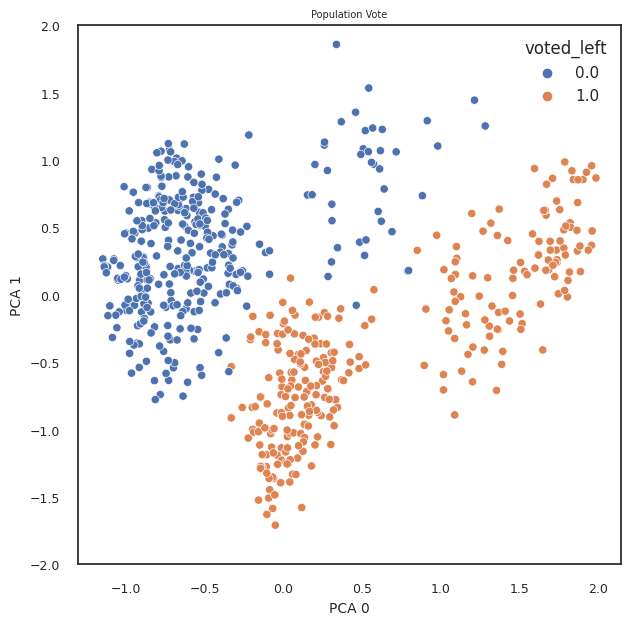

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(7, 7))
sns.set(style="white")
ax = sns.scatterplot(data=reduced, x='PCA0', y='PCA1', hue=LEFT_RIGHT_DF['voted_left'])# למה ביו יש את המידע המנורמל
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=9)
plt.title('Population Vote', fontsize=7)
plt.xlabel("PCA 0", fontsize = 10)
plt.ylabel("PCA 1", fontsize = 10)
plt.show()

#CLUSTERING

##Q7

###K-MEANS

###Hyperparameter

####Silhouette

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_list = []
for K_iter in range(2,11):
    kmeans = KMeans(n_clusters=K_iter, init='random')
    kmeans.fit(reduced)
    silhouette_list.append([K_iter,silhouette_score(reduced, kmeans.labels_)])

In [ ]:
silhouette_list

[[2, 0.5015894302881014],
 [3, 0.53615367029378],
 [4, 0.5286362930397176],
 [5, 0.46832060428836464],
 [6, 0.451894828301502],
 [7, 0.4542315003173776],
 [8, 0.4189881267291547],
 [9, 0.4416084036774955],
 [10, 0.4391020197400869]]

**silhouette -{ k = 3 }**

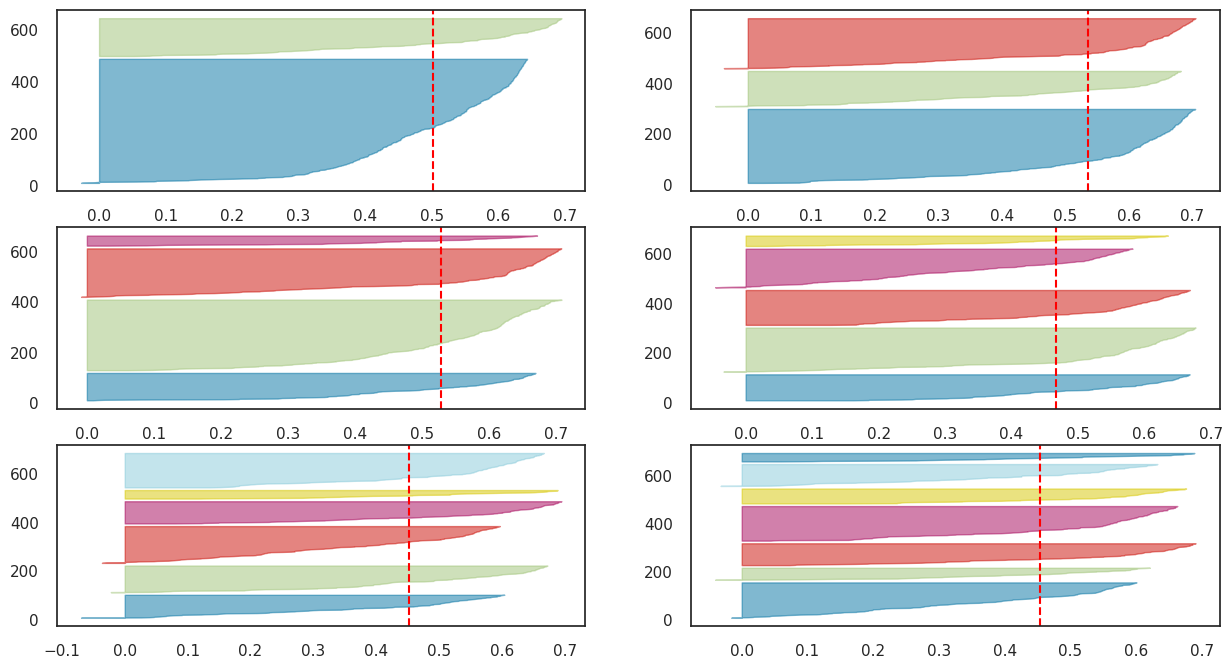

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(reduced)

**All groups cross the red line, but the most homogeneous group is K=3**


####Elbow method

In [ ]:
from sklearn.cluster import KMeans
K_list = []
WCSS_list = []
for K_iter in range(2,11):
    kmeans = KMeans(n_clusters=K_iter, init='random')
    kmeans.fit(reduced)
    K_list.append(K_iter)
    WCSS_list.append(kmeans.inertia_)

In [ ]:
K_list

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
WCSS_list

[369.7816982203517,
 174.54994844023696,
 135.34704198764717,
 103.45510329362767,
 82.15814078357803,
 65.27454230085016,
 56.34563650581609,
 49.385086944131494,
 44.59275306400723]

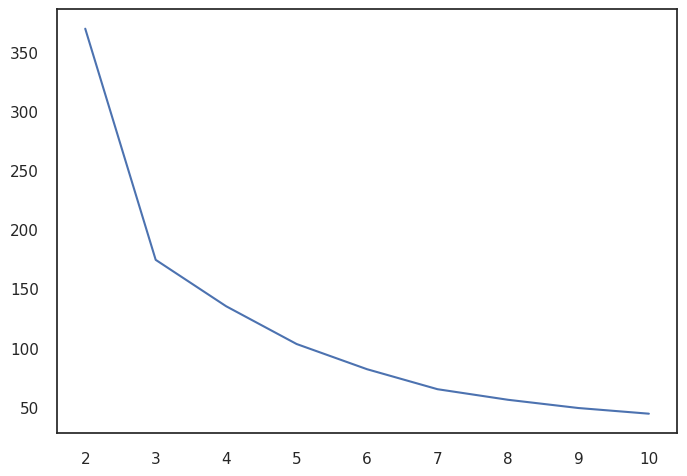

In [ ]:
sns.lineplot(x = K_list, y = WCSS_list);

**elbow -{ k = 3 }**

##Q8

**we got the same K in both methods (K = 3)**

##Q9

**Divided into 3 groups**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=100, random_state=42)
kmeans.fit(reduced)

KMeans(n_clusters=3, n_init=100, random_state=42)

In [ ]:
centroids_df = pd.DataFrame(data=kmeans.cluster_centers_,columns=reduced.columns)

In [ ]:
reduced['Cluster'] = kmeans.predict(reduced)

<Axes: title={'center': 'Population Vote'}, xlabel='PCA0', ylabel='PCA1'>

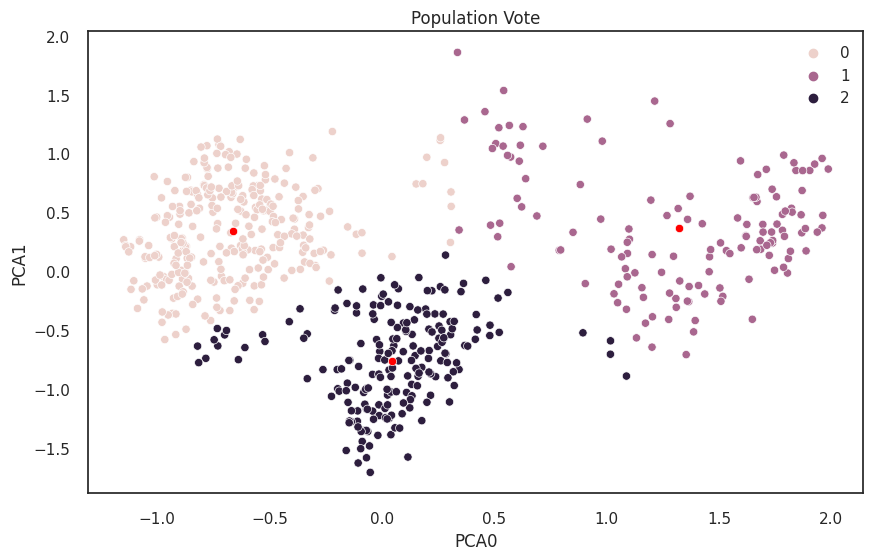

In [ ]:
import matplotlib.cm as cm
ax = plt.figure(figsize=(10,6))
sns.scatterplot(data=reduced,x='PCA0', y='PCA1', hue=reduced['Cluster'],cmap='jet').set_title("Population Vote")
sns.scatterplot(data=centroids_df,x='PCA0', y='PCA1', color="red")

##Q10

In [ ]:
df_copy [ 'Cluster' ] = reduced ['Cluster']

In [ ]:
df_copy.head()

,What do you think of Israel's situation today?,How much you trust in each of these institutions: the media,How much you trust in each of these institutions: the Supreme Court,How much you trust in each of these institutions: the police,How much you trust in each of these institutions: President of the State,How much you trust in each of these institutions: the introduction,How much you trust in each of these institutions: the IDF,How much you trust in each of these institutions: the government,How much do you trust in each of these institutions: the parties,Do you agree or disagree that Israel should have more rights to Jewish citizens than non-Jewish citizens:,...,Which party vote in the last election for the Knesset (March 2021):_Torah judaism,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv,voted_left,Cluster
0,2,3,2,1,0,1,3,1,1,4,...,0,0,0,0,0,0,0,1,0.0,0.0
1,1,1,1,1,2,1,2,1,1,4,...,0,0,0,0,0,0,0,1,0.0,0.0
2,4,1,2,2,3,2,3,2,1,1,...,0,1,0,0,0,0,0,0,0.0,0.0
3,4,0,4,1,4,2,4,3,1,1,...,0,0,0,1,0,0,0,0,1.0,2.0
4,3,2,2,2,2,2,3,1,1,2,...,0,1,0,0,0,0,0,0,0.0,0.0


In [ ]:
look_data = df_copy.groupby('Cluster').mean()
look_data.to_excel("lookData.xlsx")
look_data

,What do you think of Israel's situation today?,How much you trust in each of these institutions: the media,How much you trust in each of these institutions: the Supreme Court,How much you trust in each of these institutions: the police,How much you trust in each of these institutions: President of the State,How much you trust in each of these institutions: the introduction,How much you trust in each of these institutions: the IDF,How much you trust in each of these institutions: the government,How much do you trust in each of these institutions: the parties,Do you agree or disagree that Israel should have more rights to Jewish citizens than non-Jewish citizens:,...,Which party vote in the last election for the Knesset (March 2021):_Thunder,Which party vote in the last election for the Knesset (March 2021):_Torah judaism,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv,voted_left
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,3.024000,1.992000,2.444000,2.168000,2.640000,1.972000,3.144000,2.012000,1.676000,2.316000,...,0.020000,0.028000,0.252000,0.160000,0.068000,0.036000,0.164000,0.104000,0.216000,0.440000
1.0,2.925620,1.752066,2.115702,1.983471,2.305785,1.801653,2.752066,1.826446,1.768595,2.247934,...,0.049587,0.181818,0.206612,0.082645,0.132231,0.041322,0.181818,0.157025,0.198347,0.371901
2.0,3.180723,2.096386,2.524096,2.313253,2.632530,1.969880,3.246988,2.072289,1.626506,2.403614,...,0.030120,0.018072,0.319277,0.096386,0.054217,0.060241,0.138554,0.144578,0.186747,0.487952


קבוצת חיזוי **0**
* אוכלוסיה שמתגוררת בחיפה/ תל אביב (באופן יחסי לשאר הקבוצות)
* הכי הרבה שהצביעו למתח הכי משמעותי שבין מזרחים לאשכנזים
* מאפיינים אנשים הנמצאים בגוש מרכז ימין

קבוצת חיזוי **1**
* מבין כל קבוצות החיזוי, הקבוצה בעלת האמונה ליהדות הכי גבוהה
* מכילה יותר גברים משאר הקבוצות
* בעלי ההשכלה הכי גבוהה ביחס לשאר קבוצות החיזוי
* היחידים שענו על הסקר באמצעות הפלאפון
* המתח הכי משמעותי בין דתי לחילוני
* הכי הרבה נוצרים/מוסלמים/דרוזים
* הקבוצה שהכי פחות מאמינה במדיה, צה"ל, ממשלה, כנסת, משטרה,ביה"מ
* אוכלוסיה רבה ממנה גרה בירושלים
* האוכלוסיה ממחוז צפון /דרום
* קבוצה בעלת ההכנסה הכי נמוכה מבין שאר הקבוצות
* קבוצה אשר נוטה יותר לגוש ימין  

קבוצת חיזוי **2**
* מבין כל הקבוצות, בעלת הגיל הממוצע הכי גבוה
* הקבוצה בעלת ההכנסה הכי גבוהה
* הכי פחות חשבו שמתח משמעותי הוא בין העשירים לעניים
* המתח המשמעותי הוא בין הימין לשמאל
* קבוצה בעלת מספר הערבים הנמוך ביותר (הכי הרבה שהצביעו -לא ערבי)
* אנשים הגרים בעיקר במרכז הארץ
* קבוצה אשר נוטה יותר לגוש מרכז

##Q11

###Correlation

In [ ]:
LEFT_RIGHT_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 73 columns):
 #   Column                                                                                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                  --------------  -----  
 0   What do you think of Israel's situation today?                                                                                                                                                                                          627 non-null    float64
 1   How much you trust in each of these institutions: the media                                                

######אופציה 1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
willingness_to_answer = LEFT_RIGHT_DF.iloc[:,19:35]

In [ ]:
LEFT_RIGHT_DF.iloc[:,19:35]

,What do you think of Israel's situation today?-do you know,How much you trust in each of these institutions: the media-do you know,How much you trust in each of these institutions: the Supreme Court-do you know,How much you trust in each of these institutions: the police-do you know,How much you trust in each of these institutions: President of the State-do you know,How much you trust in each of these institutions: the introduction-do you know,How much you trust in each of these institutions: the IDF-do you know,How much you trust in each of these institutions: the government-do you know,How much do you trust in each of these institutions: the parties-do you know,What stronger tension today in Israeli society? (Presented in rotation)-do you know,Do you agree or disagree that Israel should have more rights to Jewish citizens than non-Jewish citizens:-do you know,(Arabs) Are you:-do you know,"In Israeli politics it is customary to talk about left and right. Where would you place yourself on a scale where 1 is left, 4 is center and 7 is right?-do you know","The average (median) household income in Israel today is about NIS 16,000 gross. Is your total family income (of both spouses): [In a one-person household, the average salary for an individual is about NIS 8,000 gross]-do you know",What is your formal education?-do you know,Which party vote in the last election for the Knesset (March 2021):-do you know
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
623,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
624,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
625,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
features_columns = LEFT_RIGHT_DF[['voted_left','(To Jews) How do you religiously define yourself?','Is immigrant','What are you?', 'How old are you?', 'sector','district_Center','district_Haifa', 'district_Jerusalem', 'district_Judea and samaria', 'district_North','district_South', 'district_Tel aviv']]

In [ ]:
features_columns

,voted_left,(To Jews) How do you religiously define yourself?,Is immigrant,What are you?,How old are you?,sector,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv
0,0.0,0.4,0.0,0.0,0.172840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.6,0.0,0.0,0.345679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.2,0.0,1.0,0.222222,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.2,0.0,0.0,0.506173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.4,0.0,1.0,0.098765,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,0.0,0.0,1.0,0.185185,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
623,0.0,0.6,0.0,0.0,0.185185,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
624,1.0,0.0,0.0,0.0,0.358025,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
625,1.0,0.0,0.0,0.0,0.469136,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
correlation_matrix = pd.merge(left = willingness_to_answer, right = features_columns,left_index=True,right_index=True).corr()

print(correlation_matrix)

                                                    What do you think of Israel's situation today?-do you know  \
What do you think of Israel's situation today?-...                                           1.000000            
How much you trust in each of these institution...                                           0.198534            
How much you trust in each of these institution...                                           0.182885            
How much you trust in each of these institution...                                           0.245582            
How much you trust in each of these institution...                                           0.222711            
How much you trust in each of these institution...                                           0.182885            
How much you trust in each of these institution...                                           0.130103            
How much you trust in each of these institution...                                      

######אופציה 2

In [ ]:
LEFT_RIGHT_DF['sum_answers']= LEFT_RIGHT_DF.iloc[:,19:35].sum(axis=1)
LEFT_RIGHT_DF['sum_answers']

0      13.0
1      14.0
2      14.0
3      13.0
4      14.0
       ... 
622    14.0
623    13.0
624    13.0
625    14.0
626    14.0
Name: sum_answers, Length: 627, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler # ננרמל את הטבלה מחדש עם העמודה הנוספת ככדי שתהיה באותה סקאלה
scaler = MinMaxScaler()
LEFT_RIGHT_DF_new = pd.DataFrame(data=scaler.fit_transform(LEFT_RIGHT_DF),columns=LEFT_RIGHT_DF.columns)
LEFT_RIGHT_DF_new.head(10)

,What do you think of Israel's situation today?,How much you trust in each of these institutions: the media,How much you trust in each of these institutions: the Supreme Court,How much you trust in each of these institutions: the police,How much you trust in each of these institutions: President of the State,How much you trust in each of these institutions: the introduction,How much you trust in each of these institutions: the IDF,How much you trust in each of these institutions: the government,How much do you trust in each of these institutions: the parties,Do you agree or disagree that Israel should have more rights to Jewish citizens than non-Jewish citizens:,...,Which party vote in the last election for the Knesset (March 2021):_Torah judaism,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv,voted_left,sum_answers
0,0.4,0.75,0.50,0.25,0.00,0.25,0.75,0.25,0.25,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.909091
1,0.2,0.25,0.25,0.25,0.50,0.25,0.50,0.25,0.25,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
2,0.8,0.25,0.50,0.50,0.75,0.50,0.75,0.50,0.25,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
3,0.8,0.00,1.00,0.25,1.00,0.50,1.00,0.75,0.25,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.909091
4,0.6,0.50,0.50,0.50,0.50,0.50,0.75,0.25,0.25,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
5,0.6,0.25,0.25,0.75,0.25,0.25,1.00,0.25,0.25,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
6,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.75,0.75,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000
7,0.6,0.50,0.50,0.50,0.75,0.50,1.00,0.75,0.50,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.000000
8,0.8,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.75,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
9,0.8,0.75,1.00,0.75,1.00,0.50,1.00,0.50,0.50,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000


In [ ]:
correlation_matrix=LEFT_RIGHT_DF_new[['sum_answers','voted_left','(To Jews) How do you religiously define yourself?','Is immigrant','What are you?', 'How old are you?', 'sector','district_Center','district_Haifa', 'district_Jerusalem', 'district_Judea and samaria', 'district_North','district_South', 'district_Tel aviv']].corr()
correlation_matrix

,sum_answers,voted_left,(To Jews) How do you religiously define yourself?,Is immigrant,What are you?,How old are you?,sector,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv
sum_answers,1.000000,0.040551,0.018269,-0.072651,0.075244,-0.103086,0.145080,0.049132,0.006051,-0.076968,0.017159,-0.020723,-0.026364,0.027870
voted_left,0.040551,1.000000,-0.583026,0.005111,-0.013796,0.104163,-0.302987,-0.001695,0.081276,-0.159012,-0.123646,0.155917,-0.035222,-0.018892
(To Jews) How do you religiously define yourself?,0.018269,-0.583026,1.000000,-0.089496,0.023070,-0.051202,0.448857,0.044672,-0.136446,0.251094,0.096472,-0.267499,0.041801,0.071798
Is immigrant,-0.072651,0.005111,-0.089496,1.000000,-0.017337,0.095299,-0.244193,-0.054071,0.102111,-0.062423,-0.029885,-0.106368,0.160128,-0.000228
What are you?,0.075244,-0.013796,0.023070,-0.017337,1.000000,0.027704,0.056425,0.025092,0.020416,0.015131,-0.026080,-0.057682,0.079627,-0.052010
How old are you?,-0.103086,0.104163,-0.051202,0.095299,0.027704,1.000000,0.014350,0.077295,0.041399,-0.058929,0.036728,-0.052742,-0.048592,-0.005417
sector,0.145080,-0.302987,0.448857,-0.244193,0.056425,0.014350,1.000000,0.153428,-0.116043,0.115569,0.078405,-0.407228,0.044165,0.171681
district_Center,0.049132,-0.001695,0.044672,-0.054071,0.025092,0.077295,0.153428,1.000000,-0.222879,-0.169787,-0.116279,-0.267539,-0.213498,-0.283307
district_Haifa,0.006051,0.081276,-0.136446,0.102111,0.020416,0.041399,-0.116043,-0.222879,1.000000,-0.116229,-0.079600,-0.183146,-0.146152,-0.193940
district_Jerusalem,-0.076968,-0.159012,0.251094,-0.062423,0.015131,-0.058929,0.115569,-0.169787,-0.116229,1.000000,-0.060638,-0.139518,-0.111337,-0.147741


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z = correlation_matrix,
    x = correlation_matrix.columns,
    y = correlation_matrix.columns,
    zmax=1,
    zmin=-1
))
fig.update_layout({
    'title':"Features correlation heatmap"
})

עוצמת הקולציה-
* ככל שערך הקורלציה מתקרב לאחד או למינוס אחד, עוצמת הקורלציה יותר
.גבוהה. ככל שערך הקורלציה מתקרב לאפס, עוצמת הקורלציה חלשה יותר


* הקורלציה מתייחסת ליחס סטטיסטי בין שני משתנים. הקורלציה מודדת את החוזק ואת הכיוון של היחס בין המשתנים. ערכי הקורלציה נמצאים בתחום של -1 עד 1.

* ערך הקורלציה 1 מציין קורלציה חיובית מוחלטת. זה אומר שכאשר ערך אחד עולה, הערך השני עולה באותה המידה.
* ערך הקורלציה -1 מציין קורלציה שלילית מוחלטת. זה אומר שכאשר ערך אחד עולה, הערך השני יורד באותה המידה.
* ערך הקורלציה 0 מציין שאין קורלציה ליניארית בין המשתנים. כלומר, אין קשר ליניארי ברור בין שני המשתנים.

**ניתן לראות שהקורלציה בין מספר האנשים שענו לשאר הפיצרים מאוד נמוכה**
**קרובה מאוד ל0 ולכן ניתן להסיק שאין קשר לינארי ברור בין המשתנים**

**ניתן לראות לפי ההיט מאפ שהפיצר שיש לו את הקשר הכי "חזק" למשתנה המטרה הוא סקטור - 0.14 , קשר זה, על אף שהוא הכי גבוה באופן יחסי לפיצרים האחרים, הוא מאוד קרוב לאפס ולכן נסיק שאין קשר בין הפיצר למשתנה המטרה**